In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal

In [2]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
dado_sensor = 'dados_extraidos_rolamento_interno_radial1.csv'
ordem = 3
pasta = f'{models.path_dados_tratados}/ordens_{ordem}/{dados_normalizados}'
df = pd.read_csv(pasta, header=0)
# df = pd.DataFrame(df)[models.colunas]
# df['defeito'] = df['defeito'].replace(models.sensores)

# df['rotacao_hz'] = 10*(df['rotacao_hz']//10)
print(df['rotacao_hz'])

# df['sensor'] = df['sensor'].replace(models.sensores)

df = normalizar_sinal.NormalizarSinal(df,1).Get()
df = pd.DataFrame(df)[models.colunas]
print(df)
# print(df)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
# print(X_train)

0        0.054711
1        0.054711
2        0.054711
3        0.054711
4        0.054711
           ...   
77163    0.401216
77164    0.401216
77165    0.401216
77166    0.401216
77167    0.401216
Name: rotacao_hz, Length: 77168, dtype: float64
       rotacao_hz    maximo       rms  assimetria   curtose  fator_crista  \
0        0.054711  0.009486  0.021926    0.129497  0.054829      0.041469   
1        0.054711  0.009486  0.021918    0.129078  0.054989      0.041494   
2        0.054711  0.010020  0.021929    0.130192  0.055765      0.045112   
3        0.054711  0.010020  0.021941    0.130072  0.055856      0.045076   
4        0.054711  0.010020  0.021947    0.130561  0.055848      0.045053   
...           ...       ...       ...         ...       ...           ...   
77163    0.401216  0.118634  0.170735    0.020656  0.028296      0.081621   
77164    0.401216  0.119948  0.170627    0.020466  0.028511      0.082934   
77165    0.401216  0.119948  0.170077    0.022143  0.028921  

In [3]:
 
# Treina o classificador
clf = DecisionTreeClassifier(max_depth=10000000,random_state=1000)
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9433285819187076


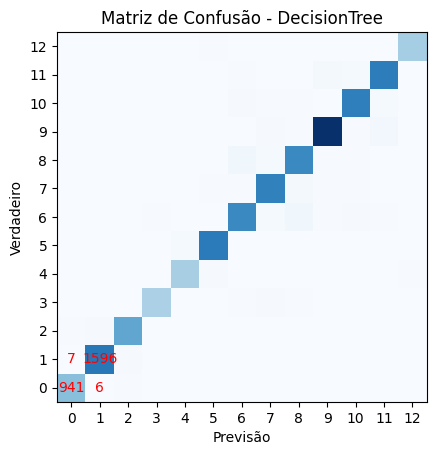

A precisão do classificador é: 94.3 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.98      0.98      0.98       963
               ball_fault_baixo       0.98      0.98      0.98      1622
               ball_fault_medio       0.97      0.97      0.97      1214
 desalinhamento_horizontal_alto       0.92      0.91      0.91       807
desalinhamento_horizontal_baixo       0.93      0.94      0.93       807
desalinhamento_horizontal_médio       0.95      0.96      0.95      1645
   desalinhamento_vertical_alto       0.90      0.89      0.90      1623
  desalinhamento_vertical_baixo       0.92      0.93      0.92      1646
  desalinhamento_vertical_médio       0.89      0.90      0.90      1615
          desbalanceamento_alto       0.95      0.94      0.94      2370
         desbalanceamento_baixo       0.93      0.93      0.93      1653
         desbalanceamento_medio       0.93      0.94    

In [4]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
metodo = 'KNeighbors'
knn.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", np.round(100*accuracy,2),'%')


Acurácia: 98.32 %


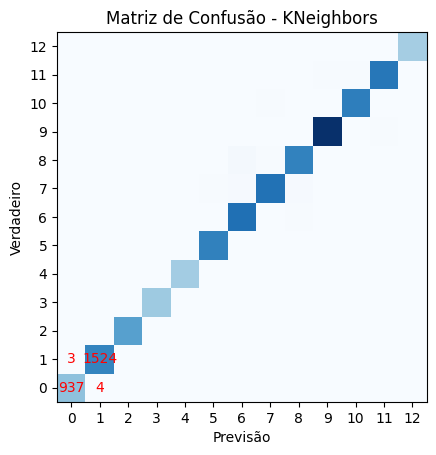

A precisão do classificador é: 98.32 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.99      0.99      0.99       942
               ball_fault_baixo       1.00      1.00      1.00      1531
               ball_fault_medio       1.00      1.00      1.00      1275
 desalinhamento_horizontal_alto       0.98      0.98      0.98       859
desalinhamento_horizontal_baixo       0.98      0.98      0.98       830
desalinhamento_horizontal_médio       0.98      0.99      0.98      1580
   desalinhamento_vertical_alto       0.96      0.98      0.97      1730
  desalinhamento_vertical_baixo       0.97      0.96      0.97      1760
  desalinhamento_vertical_médio       0.97      0.96      0.96      1617
          desbalanceamento_alto       0.99      0.99      0.99      2300
         desbalanceamento_baixo       0.98      0.97      0.97      1621
         desbalanceamento_medio       0.99      0.98   

In [6]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))